<a href="https://colab.research.google.com/github/raj-vijay/dl/blob/master/19_Track_Learning_with_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import fundamental libraries used for the tensorflow
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [ ]:
# Load the Fashion MNIST Data from TensorFlow Keras
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
# Shape of data
print("Train Images: ", train_images.shape)
print("Test Images: ", test_images.shape)

Train Images:  (60000, 28, 28)
Test Images:  (10000, 28, 28)


In [ ]:
# Reshape input data from (28, 28) to (28, 28, 1)
w, h = 28, 28
train_images = train_images.reshape(train_images.shape[0], w, h, 1)
test_images = test_images.reshape(test_images.shape[0], w, h, 1)

# One-hot encode the labels
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

# Shape of data
print("Reshaped Train Images: ", train_images.shape)
print("Reshaped Test Images: ", test_images.shape)

Reshaped Train Images:  (60000, 28, 28, 1)
Reshaped Test Images:  (10000, 28, 28, 1)


**Keras pooling layers**

Keras implements a pooling operation as a layer that can be added to CNNs between other layers. 

- Convolution => Convolution => Flatten => Dense

The architecture will add a single max-pooling layer between the convolutional layer and the dense layer with a pooling of 2x2:

- Convolution => Max pooling => Convolution => Flatten => Dense

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D

model = Sequential()

# Add a convolutional layer
model.add(Conv2D(100, kernel_size=2, activation='relu', 
                 input_shape=(28, 28, 1)))

# Add a pooling operation
model.add(MaxPool2D(2))

# Add another convolutional layer
model.add(Conv2D(50, kernel_size=2, activation='relu',
input_shape=(28, 28, 1)))

# Flatten and feed to output layer
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.summary()

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 27, 27, 100)       500       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 100)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 50)        20050     
_________________________________________________________________
flatten_1 (Flatten)          (None, 7200)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                72010     
Total params: 92,560
Trainable params: 92,560
Non-trainable params: 0
_________________________________________________________________


**Train a deep CNN with pooling to classify images**

Training a CNN with pooling layers is very similar to training of the deep networks. 

Once the network is constructed, the model needs to be appropriately compiled, and then training data needs to be provided, together with the other arguments that control the fitting procedure.

In [ ]:
# Compile the model 
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [ ]:
# Fit the model to training data 
model.fit(train_images, train_labels, validation_split=0.2, epochs=3, batch_size=10)

Train on 48000 samples, validate on 12000 samples
Epoch 1/3
48000/48000 [==============================] - 81s 2ms/step - loss: 0.5214 - accuracy: 0.8261 - val_loss: 0.3979 - val_accuracy: 0.8589
Epoch 2/3
48000/48000 [==============================] - 81s 2ms/step - loss: 0.3538 - accuracy: 0.8723 - val_loss: 0.3482 - val_accuracy: 0.8774
Epoch 3/3
48000/48000 [==============================] - 78s 2ms/step - loss: 0.3116 - accuracy: 0.8875 - val_loss: 0.3511 - val_accuracy: 0.8726


**Evaluating a CNN with test data**

To evaluate a trained neural network, provide a separate testing data set of labeled images.

In [ ]:
# Evaluate the model on separate test data
model.evaluate(test_images, test_labels, batch_size=10)

10000/10000 [==============================] - 4s 435us/step


[0.36331276620179415, 0.8665000200271606]

**Plot the learning curves**

During learning, the model will store the loss function evaluated in each epoch. Looking at the learning curves can tell us quite a bit about the learning process.

Train on 48000 samples, validate on 12000 samples
Epoch 1/3
48000/48000 [==============================] - 80s 2ms/step - loss: 0.2923 - accuracy: 0.8930 - val_loss: 0.3220 - val_accuracy: 0.8882
Epoch 2/3
48000/48000 [==============================] - 80s 2ms/step - loss: 0.2773 - accuracy: 0.8980 - val_loss: 0.3315 - val_accuracy: 0.8852
Epoch 3/3
48000/48000 [==============================] - 80s 2ms/step - loss: 0.2644 - accuracy: 0.9015 - val_loss: 0.3291 - val_accuracy: 0.8892


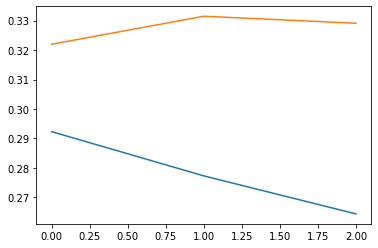

In [ ]:
import matplotlib.pyplot as plt

# Train the model and store the training object
training = model.fit(train_images, train_labels,
epochs=3, batch_size = 10, validation_split=0.2)

# Extract the history from the training object
history = training.history

# Plot the training loss 
plt.plot(history['loss'])
# Plot the validation loss
plt.plot(history['val_loss'])

# Show the figure
plt.show()

**Using stored weights to predict in a test set**

Model weights stored in an hdf5 file can be reused to populate an untrained model. 

Once the weights are loaded into this model, it behaves just like a model that has been trained to reach these weights. 

In [ ]:
# Load the weights from file
model.load_weights('weights.hdf5')

# Predict from the first three images in the test data
model.predict(test_data[:3,:,:,:])